In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
#fhb
model_1 = tf.keras.models.load_model('/data/embryo/method_1/saved_model/fhb/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator_1 = validation_datagen.flow_from_directory(
    '/data/embryo/method_1/validation/',
    batch_size=8,
    class_mode='binary',
    shuffle=False
)
y_pred_1 = model_1.predict_generator(validation_generator_1, steps=77//8+1)
y_true_1 = validation_generator_1.classes
fpr_1, tpr_1, thresh_1 = roc_curve(y_true_1, y_pred_1, pos_label=1)


Found 77 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.


In [3]:
model_2 = tf.keras.models.load_model('/data/embryo/method_2/saved_model/fhb/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator_2 = validation_datagen.flow_from_directory(
    '/data/embryo/method_2/validation/',
    batch_size=16,
    class_mode='binary',
    shuffle=False
)
y_pred_2 = model_2.predict_generator(validation_generator_2, steps=77//16+1)
y_true_2 = validation_generator_2.classes
fpr_2, tpr_2, thresh_2 = roc_curve(y_true_2, y_pred_2, pos_label=1)

Found 77 images belonging to 2 classes.


In [4]:
model_3 = tf.keras.models.load_model('/data/embryo/method_3/saved_model/fhb/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator_3 = validation_datagen.flow_from_directory(
    '/data/embryo/method_3/validation/',
    batch_size=8,
    class_mode='binary',
    shuffle=False
)
y_pred_3 = model_3.predict_generator(validation_generator_3, steps=77//8+1)
y_true_3 = validation_generator_3.classes
fpr_3, tpr_3, thresh_3 = roc_curve(y_true_3, y_pred_3, pos_label=1)

Found 77 images belonging to 2 classes.


In [5]:
random_probs = [0 for i in range(len(y_true_1))]
random_fpr, random_tpr, _ = roc_curve(y_true_1, random_probs, pos_label=1)

In [6]:
auc_1= roc_auc_score(y_true_1, y_pred_1)
auc_2= roc_auc_score(y_true_2, y_pred_2)
auc_3= roc_auc_score(y_true_3, y_pred_3)

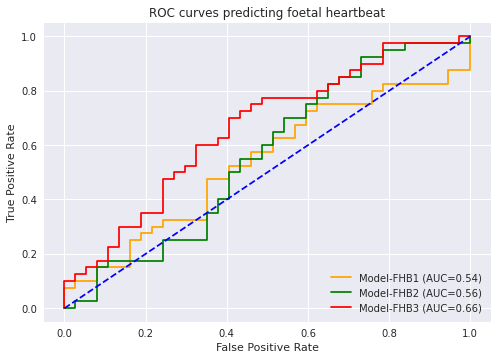

In [8]:
plt.style.use('seaborn')
plt.plot(fpr_2, tpr_2, color='orange', label='Model-FHB1 (AUC={:.2f})'.format(auc_2))
plt.plot(fpr_1, tpr_1, color='green', label='Model-FHB2 (AUC={:.2f})'.format(auc_1))
plt.plot(fpr_3, tpr_3, color='red', label='Model-FHB3 (AUC={:.2f})'.format(auc_3))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves predicting foetal heartbeat')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [9]:
#icm-model-2
model_icm_1 = tf.keras.models.load_model('/data/embryo/method_1/grade/saved_model/first_grade/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_df_1 = pd.read_csv('/data/embryo/method_1/validation_grade.csv', dtype= str)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_df_1,
    directory = '/data/embryo/method_1/',
    x_col = 'id',
    y_col = 'First',
    batch_size=16,
    class_mode = 'categorical',
    shuffle=False)
y_pred_1 = model_icm_1.predict_generator(validation_generator, steps=80//16+1)
y_true_1 = validation_generator.classes

fpr_1 = {}
tpr_1 = {}
thresh_1 = {}
auroc_1 = {}

n_classes = 3

for i in range(n_classes):
    fpr_1[i], tpr_1[i], thresh_1[i] = roc_curve(y_true_1, y_pred_1[:,i], pos_label=i)
    auroc_1[i] = auc(fpr_1[i], tpr_1[i])


Found 80 validated image filenames belonging to 3 classes.


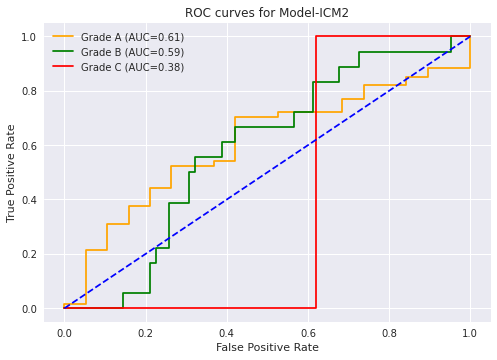

In [11]:
plt.style.use('seaborn')
plt.plot(fpr_1[0], tpr_1[0], color='orange', label='Grade A (AUC={:.2f})'.format(auroc_1[0]))
plt.plot(fpr_1[1], tpr_1[1], color='green', label='Grade B (AUC={:.2f})'.format(auroc_1[1]))
plt.plot(fpr_1[2], tpr_1[2], color='red', label='Grade C (AUC={:.2f})'.format(auroc_1[2]))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves for Model-ICM2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()

In [12]:
#icm-model-1
model_icm_2 = tf.keras.models.load_model('/data/embryo/method_2/grade/saved_model/first_grade/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_df_2 = pd.read_csv('/data/embryo/method_2/validation_grade.csv', dtype= str)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_df_2,
    directory = '/data/embryo/method_2/',
    x_col = 'id',
    y_col = 'First',
    batch_size=16,
    class_mode = 'categorical',
    shuffle=False)
y_pred_2 = model_icm_2.predict_generator(validation_generator, steps=76//16+1)
y_true_2 = validation_generator.classes

fpr_2 = {}
tpr_2 = {}
thresh_2 = {}
auroc_2 = {}

n_classes = 3

for i in range(n_classes):
    fpr_2[i], tpr_2[i], thresh_2[i] = roc_curve(y_true_2, y_pred_2[:,i], pos_label=i)
    auroc_2[i] = auc(fpr_2[i], tpr_2[i])

Found 76 validated image filenames belonging to 3 classes.


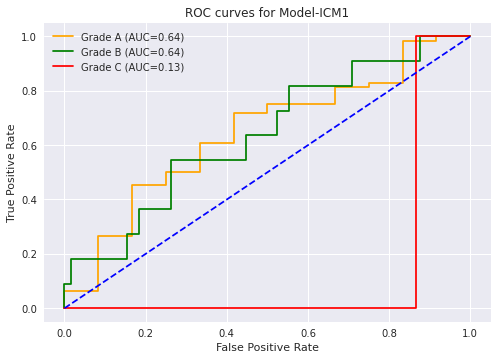

In [13]:
plt.style.use('seaborn')
plt.plot(fpr_2[0], tpr_2[0], color='orange', label='Grade A (AUC={:.2f})'.format(auroc_2[0]))
plt.plot(fpr_2[1], tpr_2[1], color='green', label='Grade B (AUC={:.2f})'.format(auroc_2[1]))
plt.plot(fpr_2[2], tpr_2[2], color='red', label='Grade C (AUC={:.2f})'.format(auroc_2[2]))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves for Model-ICM1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()

In [16]:
#icm-model-3
model_icm_3 = tf.keras.models.load_model('/data/embryo/method_3/grade/saved_model/first_grade/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_df_3 = pd.read_csv('/data/embryo/method_3/validation_grade.csv', dtype= str)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_df_3,
    directory = '/data/embryo/method_3/',
    x_col = 'id',
    y_col = 'First',
    batch_size=16,
    class_mode = 'categorical',
    shuffle=False)
y_pred_3 = model_icm_3.predict_generator(validation_generator, steps=77//16+1)
y_true_3 = validation_generator.classes

fpr_3 = {}
tpr_3 = {}
thresh_3 = {}
auroc_3 = {}

n_classes = 3

for i in range(n_classes):
    fpr_3[i], tpr_3[i], thresh_3[i] = roc_curve(y_true_3, y_pred_3[:,i], pos_label=i)
    auroc_3[i] = auc(fpr_3[i], tpr_3[i])

Found 77 validated image filenames belonging to 3 classes.


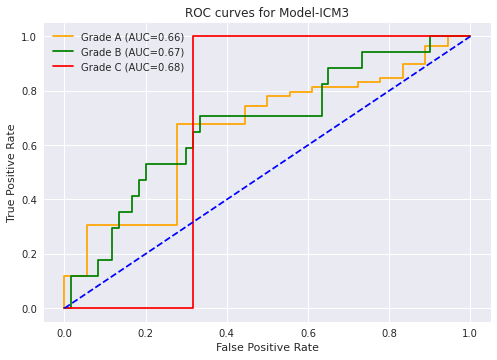

In [15]:
plt.style.use('seaborn')
plt.plot(fpr_3[0], tpr_3[0], color='orange', label='Grade A (AUC={:.2f})'.format(auroc_3[0]))
plt.plot(fpr_3[1], tpr_3[1], color='green', label='Grade B (AUC={:.2f})'.format(auroc_3[1]))
plt.plot(fpr_3[2], tpr_3[2], color='red', label='Grade C (AUC={:.2f})'.format(auroc_3[2]))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves for Model-ICM3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()

In [105]:
weighted_auroc_icm_2 = roc_auc_score(y_true_1, y_pred_1, multi_class='ovr', average='weighted')
weighted_auroc_icm_1 = roc_auc_score(y_true_2, y_pred_2, multi_class='ovr', average='weighted')
weighted_auroc_icm_3 = roc_auc_score(y_true_3, y_pred_3, multi_class='ovr', average='weighted')
print('Weighted average AUC for ICM quality: Model 1: {:.2f}, Model 2: {:.2f}, Model 3: {:.2f}'.format(weighted_auroc_icm_1, weighted_auroc_icm_2, weighted_auroc_icm_3))

Weighted average AUC for ICM quality: Model 1: 0.64, Model 2: 0.60, Model 3: 0.66


In [17]:
#te-model-2
model_te_1 = tf.keras.models.load_model('/data/embryo/method_1/grade/saved_model/second_grade/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_df_1 = pd.read_csv('/data/embryo/method_1/validation_grade.csv', dtype= str)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_df_1,
    directory = '/data/embryo/method_1/',
    x_col = 'id',
    y_col = 'Second',
    batch_size=16,
    class_mode = 'categorical',
    shuffle=False)
y_pred_1 = model_te_1.predict_generator(validation_generator, steps=80//16+1)
y_true_1 = validation_generator.classes

fpr_1 = {}
tpr_1 = {}
thresh_1 = {}
auroc_1 = {}

n_classes = 3

for i in range(n_classes):
    fpr_1[i], tpr_1[i], thresh_1[i] = roc_curve(y_true_1, y_pred_1[:,i], pos_label=i)
    auroc_1[i] = auc(fpr_1[i], tpr_1[i])


Found 80 validated image filenames belonging to 3 classes.


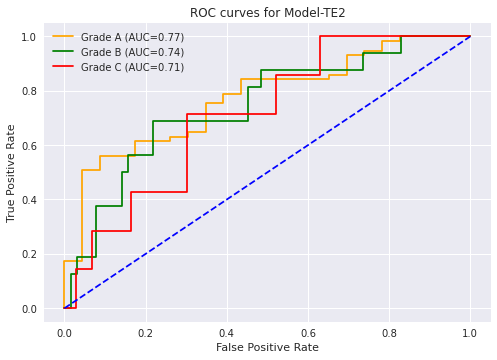

In [18]:
plt.style.use('seaborn')
plt.plot(fpr_1[0], tpr_1[0], color='orange', label='Grade A (AUC={:.2f})'.format(auroc_1[0]))
plt.plot(fpr_1[1], tpr_1[1], color='green', label='Grade B (AUC={:.2f})'.format(auroc_1[1]))
plt.plot(fpr_1[2], tpr_1[2], color='red', label='Grade C (AUC={:.2f})'.format(auroc_1[2]))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves for Model-TE2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()

In [19]:
#te-model-1
model_te_2 = tf.keras.models.load_model('/data/embryo/method_2/grade/saved_model/second_grade/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_df_2 = pd.read_csv('/data/embryo/method_2/validation_grade.csv', dtype= str)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_df_2,
    directory = '/data/embryo/method_2/',
    x_col = 'id',
    y_col = 'Second',
    batch_size=16,
    class_mode = 'categorical',
    shuffle=False)
y_pred_2 = model_te_2.predict_generator(validation_generator, steps=76//16+1)
y_true_2 = validation_generator.classes

fpr_2 = {}
tpr_2 = {}
thresh_2 = {}
auroc_2 = {}

n_classes = 3

for i in range(n_classes):
    fpr_2[i], tpr_2[i], thresh_2[i] = roc_curve(y_true_2, y_pred_2[:,i], pos_label=i)
    auroc_2[i] = auc(fpr_2[i], tpr_2[i])

Found 76 validated image filenames belonging to 3 classes.


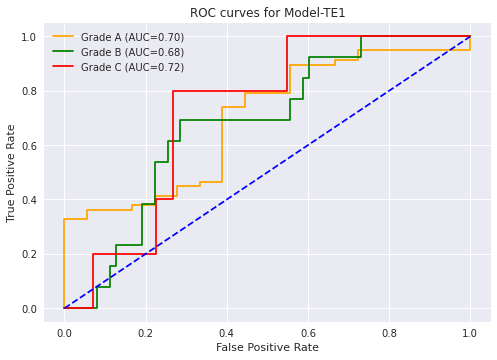

In [20]:
plt.style.use('seaborn')
plt.plot(fpr_2[0], tpr_2[0], color='orange', label='Grade A (AUC={:.2f})'.format(auroc_2[0]))
plt.plot(fpr_2[1], tpr_2[1], color='green', label='Grade B (AUC={:.2f})'.format(auroc_2[1]))
plt.plot(fpr_2[2], tpr_2[2], color='red', label='Grade C (AUC={:.2f})'.format(auroc_2[2]))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves for Model-TE1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()

In [21]:
#te-model-3
model_te_3 = tf.keras.models.load_model('/data/embryo/method_3/grade/saved_model/second_grade/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_df_3 = pd.read_csv('/data/embryo/method_3/validation_grade.csv', dtype= str)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_df_3,
    directory = '/data/embryo/method_3/',
    x_col = 'id',
    y_col = 'Second',
    batch_size=16,
    class_mode = 'categorical',
    shuffle=False)
y_pred_3 = model_te_3.predict_generator(validation_generator, steps=77//16+1)
y_true_3 = validation_generator.classes

fpr_3 = {}
tpr_3 = {}
thresh_3 = {}
auroc_3 = {}

n_classes = 3

for i in range(n_classes):
    fpr_3[i], tpr_3[i], thresh_3[i] = roc_curve(y_true_3, y_pred_3[:,i], pos_label=i)
    auroc_3[i] = auc(fpr_3[i], tpr_3[i])

Found 77 validated image filenames belonging to 3 classes.


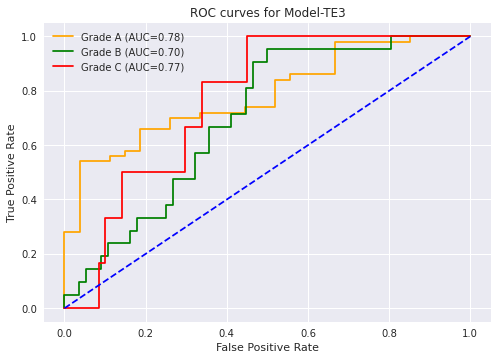

In [22]:
plt.style.use('seaborn')
plt.plot(fpr_3[0], tpr_3[0], color='orange', label='Grade A (AUC={:.2f})'.format(auroc_3[0]))
plt.plot(fpr_3[1], tpr_3[1], color='green', label='Grade B (AUC={:.2f})'.format(auroc_3[1]))
plt.plot(fpr_3[2], tpr_3[2], color='red', label='Grade C (AUC={:.2f})'.format(auroc_3[2]))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves for Model-TE3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()

In [109]:
weighted_auroc_te_2 = roc_auc_score(y_true_1, y_pred_1, multi_class='ovr', average='weighted')
weighted_auroc_te_1 = roc_auc_score(y_true_2, y_pred_2, multi_class='ovr', average='weighted')
weighted_auroc_te_3 = roc_auc_score(y_true_3, y_pred_3, multi_class='ovr', average='weighted')
print('Weighted average AUC for TE quality: Model 1: {:.2f}, Model 2: {:.2f}, Model 3: {:.2f}'.format(weighted_auroc_te_1, weighted_auroc_te_2, weighted_auroc_te_3))

Weighted average AUC for TE quality: Model 1: 0.70, Model 2: 0.76, Model 3: 0.76


In [23]:
#quality-model-2
model_qual_1 = tf.keras.models.load_model('/data/embryo/method_1/grade/saved_model/top_1_grade/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_df_1 = pd.read_csv('/data/embryo/method_1/validation_grade.csv', dtype= str)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_df_1,
    directory = '/data/embryo/method_1/',
    x_col = 'id',
    y_col = 'label',
    batch_size=8,
    class_mode = 'categorical',
    shuffle=False)
y_pred_1 = model_qual_1.predict_generator(validation_generator, steps=80//8+1)
y_true_1 = validation_generator.classes

fpr_1 = {}
tpr_1 = {}
thresh_1 = {}
auroc_1 = {}

n_classes = 7

for i in range(n_classes):
    fpr_1[i], tpr_1[i], thresh_1[i] = roc_curve(y_true_1, y_pred_1[:,i], pos_label=i)
    auroc_1[i] = auc(fpr_1[i], tpr_1[i])

Found 80 validated image filenames belonging to 7 classes.


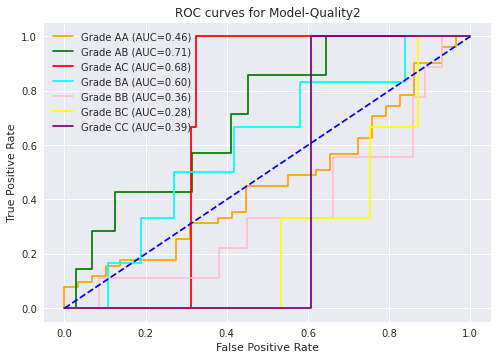

In [24]:
plt.style.use('seaborn')
plt.plot(fpr_1[0], tpr_1[0], color='orange', label='Grade AA (AUC={:.2f})'.format(auroc_1[0]))
plt.plot(fpr_1[1], tpr_1[1], color='green', label='Grade AB (AUC={:.2f})'.format(auroc_1[1]))
plt.plot(fpr_1[2], tpr_1[2], color='red', label='Grade AC (AUC={:.2f})'.format(auroc_1[2]))
plt.plot(fpr_1[3], tpr_1[3], color='cyan', label='Grade BA (AUC={:.2f})'.format(auroc_1[3]))
plt.plot(fpr_1[4], tpr_1[4], color='pink', label='Grade BB (AUC={:.2f})'.format(auroc_1[4]))
plt.plot(fpr_1[5], tpr_1[5], color='yellow', label='Grade BC (AUC={:.2f})'.format(auroc_1[5]))
plt.plot(fpr_1[6], tpr_1[6], color='purple', label='Grade CC (AUC={:.2f})'.format(auroc_1[6]))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves for Model-Quality2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()

In [25]:
#quality-model-1
model_qual_2 = tf.keras.models.load_model('/data/embryo/method_2/grade/saved_model/top_1_grade/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_df_2 = pd.read_csv('/data/embryo/method_2/validation_grade.csv', dtype= str)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_df_2,
    directory = '/data/embryo/method_2/',
    x_col = 'id',
    y_col = 'label',
    batch_size=8,
    class_mode = 'categorical',
    shuffle=False)
y_pred_2 = model_qual_2.predict_generator(validation_generator, steps=76//8+1)
y_true_2 = validation_generator.classes

fpr_2 = {}
tpr_2 = {}
thresh_2 = {}
auroc_2 = {}

n_classes = 7

for i in range(n_classes):
    fpr_2[i], tpr_2[i], thresh_2[i] = roc_curve(y_true_2, y_pred_2[:,i], pos_label=i)
    auroc_2[i] = auc(fpr_2[i], tpr_2[i])

Found 76 validated image filenames belonging to 7 classes.


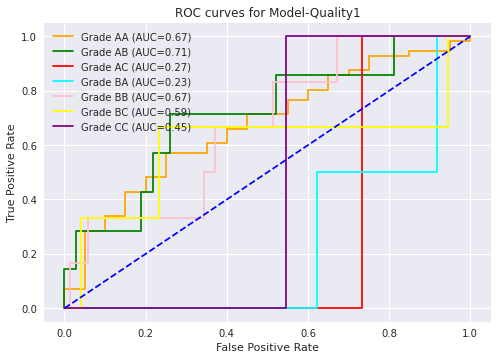

In [26]:
plt.style.use('seaborn')
plt.plot(fpr_2[0], tpr_2[0], color='orange', label='Grade AA (AUC={:.2f})'.format(auroc_2[0]))
plt.plot(fpr_2[1], tpr_2[1], color='green', label='Grade AB (AUC={:.2f})'.format(auroc_2[1]))
plt.plot(fpr_2[2], tpr_2[2], color='red', label='Grade AC (AUC={:.2f})'.format(auroc_2[2]))
plt.plot(fpr_2[3], tpr_2[3], color='cyan', label='Grade BA (AUC={:.2f})'.format(auroc_2[3]))
plt.plot(fpr_2[4], tpr_2[4], color='pink', label='Grade BB (AUC={:.2f})'.format(auroc_2[4]))
plt.plot(fpr_2[5], tpr_2[5], color='yellow', label='Grade BC (AUC={:.2f})'.format(auroc_2[5]))
plt.plot(fpr_2[6], tpr_2[6], color='purple', label='Grade CC (AUC={:.2f})'.format(auroc_2[6]))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves for Model-Quality1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()

In [27]:
#quality-model-3
model_qual_3 = tf.keras.models.load_model('/data/embryo/method_3/grade/saved_model/top_1_grade/')
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_df_3 = pd.read_csv('/data/embryo/method_3/validation_grade.csv', dtype= str)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_df_3,
    directory = '/data/embryo/method_3/',
    x_col = 'id',
    y_col = 'label',
    batch_size=8,
    class_mode = 'categorical',
    shuffle=False)
y_pred_3 = model_qual_2.predict_generator(validation_generator, steps=77//8+1)
y_true_3 = validation_generator.classes

fpr_3 = {}
tpr_3 = {}
thresh_3 = {}
auroc_3 = {}

n_classes = 7

for i in range(n_classes):
    fpr_3[i], tpr_3[i], thresh_3[i] = roc_curve(y_true_3, y_pred_3[:,i], pos_label=i)
    auroc_3[i] = auc(fpr_3[i], tpr_3[i])

Found 77 validated image filenames belonging to 7 classes.


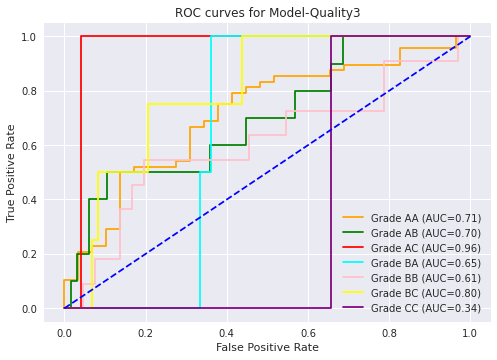

In [28]:
plt.style.use('seaborn')
plt.plot(fpr_3[0], tpr_3[0], color='orange', label='Grade AA (AUC={:.2f})'.format(auroc_3[0]))
plt.plot(fpr_3[1], tpr_3[1], color='green', label='Grade AB (AUC={:.2f})'.format(auroc_3[1]))
plt.plot(fpr_3[2], tpr_3[2], color='red', label='Grade AC (AUC={:.2f})'.format(auroc_3[2]))
plt.plot(fpr_3[3], tpr_3[3], color='cyan', label='Grade BA (AUC={:.2f})'.format(auroc_3[3]))
plt.plot(fpr_3[4], tpr_3[4], color='pink', label='Grade BB (AUC={:.2f})'.format(auroc_3[4]))
plt.plot(fpr_3[5], tpr_3[5], color='yellow', label='Grade BC (AUC={:.2f})'.format(auroc_3[5]))
plt.plot(fpr_3[6], tpr_3[6], color='purple', label='Grade CC (AUC={:.2f})'.format(auroc_3[6]))
plt.plot(random_fpr, random_tpr, linestyle='--', color='blue')
plt.title('ROC curves for Model-Quality3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [113]:
weighted_auroc_qual_2 = roc_auc_score(y_true_1, y_pred_1, multi_class='ovr', average='weighted')
weighted_auroc_qual_1 = roc_auc_score(y_true_2, y_pred_2, multi_class='ovr', average='weighted')
weighted_auroc_qual_3 = roc_auc_score(y_true_3, y_pred_3, multi_class='ovr', average='weighted')
print('Weighted average AUC for embryo quality: Model 1: {:.2f}, Model 2: {:.2f}, Model 3: {:.2f}'.format(weighted_auroc_qual_1, weighted_auroc_qual_2, weighted_auroc_qual_3))

Weighted average AUC for embryo quality: Model 1: 0.65, Model 2: 0.48, Model 3: 0.70
